In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataframe
df.head()


,value
date,
2016-05-09,125
2016-05-10,256
2016-05-11,119
2016-05-12,214
2016-05-13,257


In [2]:
# Calculate the 2.5% and 97.5% quantiles
q_low = df['value'].quantile(0.025)
q_high = df['value'].quantile(0.975)

# Filter out the top 2.5% and bottom 2.5% of the dataset
df_clean = df[(df['value'] >= q_low) & (df['value'] <= q_high)]

# Display the cleaned data
df_clean.head()


,value
date,
2016-05-09,125
2016-05-10,256
2016-05-11,119
2016-05-12,214
2016-05-13,257


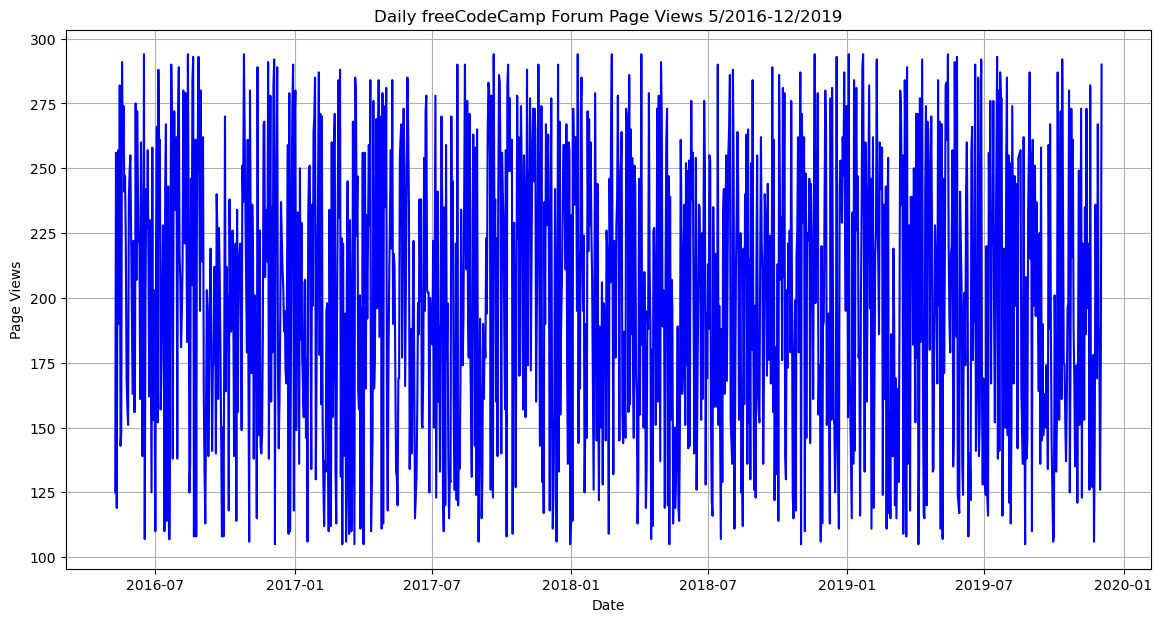

In [3]:
def draw_line_plot():
    # Create a copy of the cleaned dataframe
    df_line = df_clean.copy()
    
    # Draw the line plot
    plt.figure(figsize=(14, 7))
    plt.plot(df_line.index, df_line['value'], color='blue')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.grid(True)
    plt.savefig('line_plot.png')
    plt.show()

# Call the function
draw_line_plot()


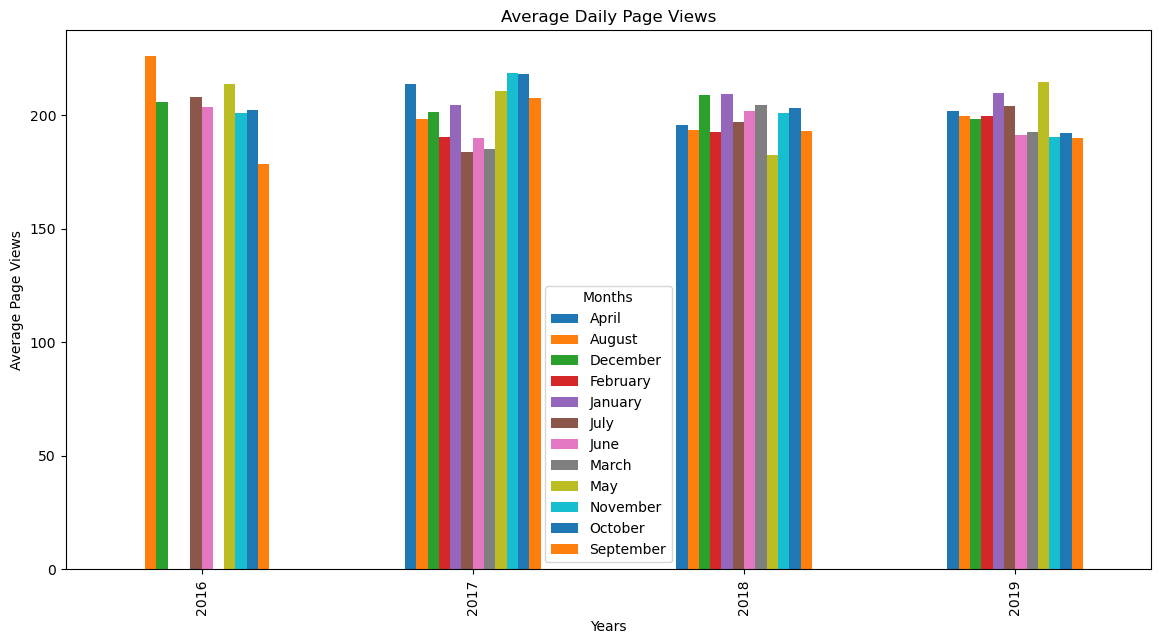

In [4]:
def draw_bar_plot():
    # Create a copy of the cleaned dataframe
    df_bar = df_clean.copy()
    
    # Extract year and month from the index
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    # Group by year and month and calculate the average page views
    df_bar_grouped = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Draw the bar plot
    df_bar_grouped.plot(kind='bar', figsize=(14, 7))
    plt.title('Average Daily Page Views')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.savefig('bar_plot.png')
    plt.show()

# Call the function
draw_bar_plot()


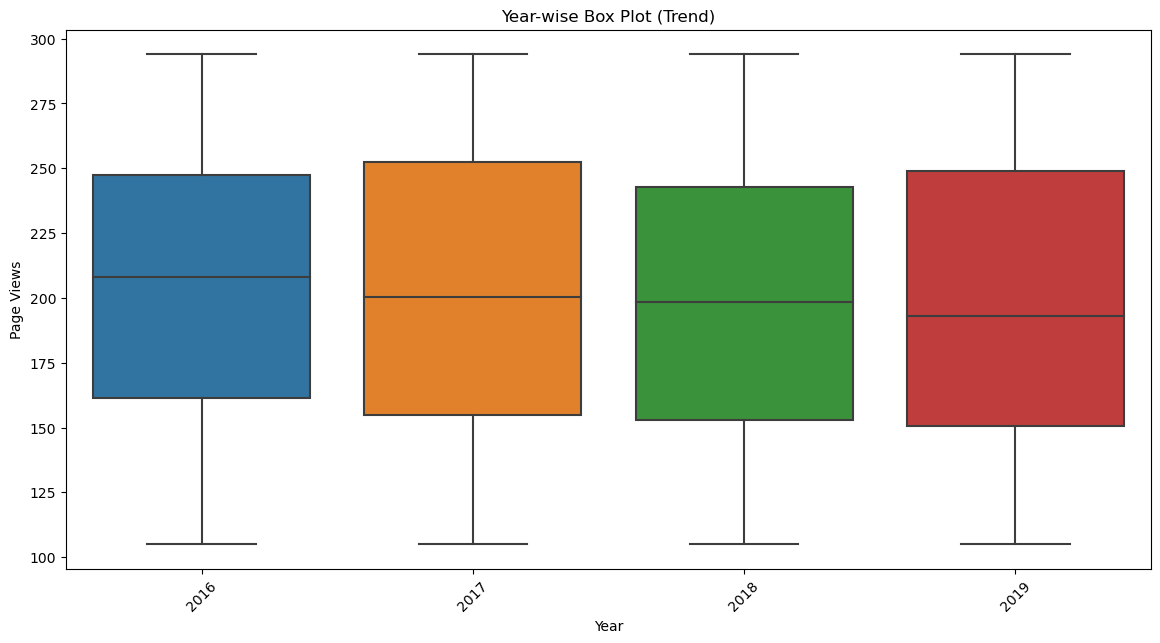

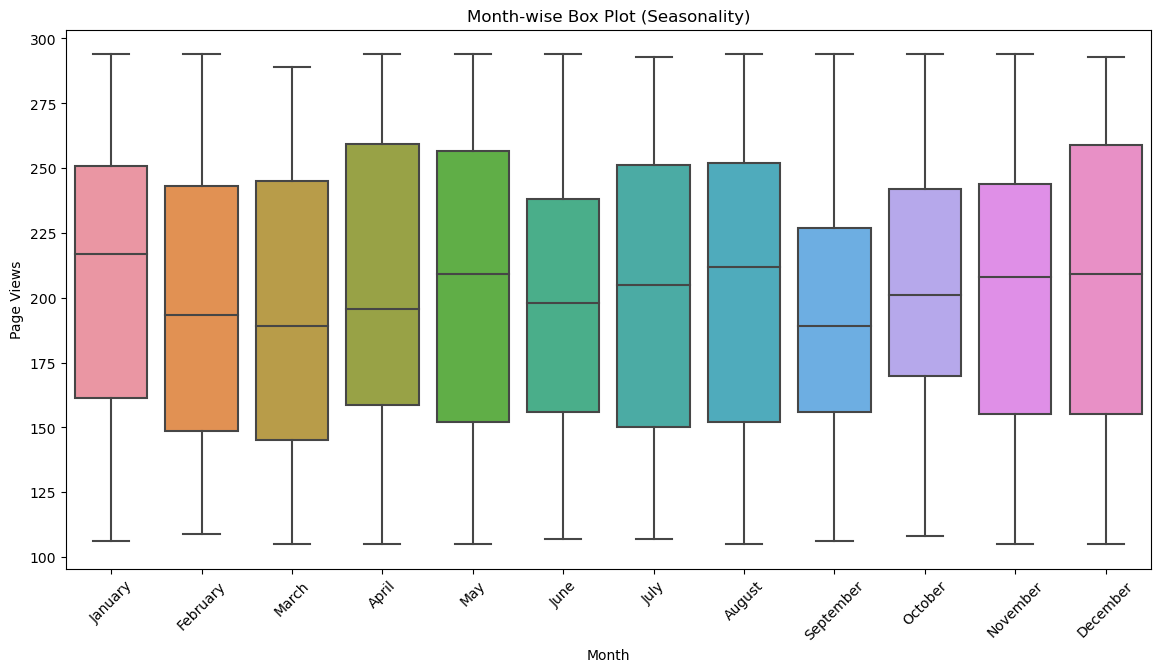

In [5]:
def draw_box_plot():
    # Create a copy of the cleaned dataframe
    df_box = df_clean.copy()
    
    # Extract year and month from the index
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month_name()
    
    # Draw the Year-wise box plot
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='year', y='value', data=df_box)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.savefig('box_plot_year.png')
    plt.show()
    
    # Draw the Month-wise box plot
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='month', y='value', data=df_box, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.savefig('box_plot_month.png')
    plt.show()

# Call the function
draw_box_plot()
